# Introduction

Today we'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO 
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence. I recommend you use download the .csv files provided in this lesson. 

# Import Statements

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Exploration

**Challenge**: How many different colours does the LEGO company produce? Read the colors.csv file in the data folder and find the total number of unique colours. Try using the [.nunique() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html?highlight=nunique#pandas.DataFrame.nunique) to accomplish this.

In [6]:
# Reading colors
colors_df = pd.read_csv("./data/colors.csv")
colors_df.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [5]:
# To find unique elements
# colors_df.nunique()

# Gives us just the unique colors info
colors_df.name.nunique()

135

**Challenge**: Find the number of transparent colours where <code>is_trans == 't'</code> versus the number of opaque colours where <code>is_trans == 'f'</code>. See if you can accomplish this in two different ways.

One Way to do it is by pivoting table with is_trans being the columns and then counting

In [8]:
trans_df = colors_df.pivot(index='name', columns='is_trans', values='rgb')
print(f"Transparent colors: {trans_df.t.count()}\nOpaque colors: {trans_df.f.count()}")

Transparent colors: 28
Opaque colors: 107


One other way can be manually traversing through the data.

In [10]:
tranparent_colors = 0
opaque_colors = 0

for i in colors_df.is_trans:
  if i == 't':
    tranparent_colors += 1
  else:
    opaque_colors += 1

print(f"Transparent colors: {tranparent_colors}\nOpaque colors: {opaque_colors}")

Transparent colors: 28
Opaque colors: 107


**Two other ways** by which it can be done more efficiently

In [11]:
# By using groupby
colors_df.groupby('is_trans').count()

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


In [12]:
# By using a new function called .value_counts()
colors_df.is_trans.value_counts() 

is_trans
f    107
t     28
Name: count, dtype: int64


### Understanding LEGO Themes vs. LEGO Sets

Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.

![image](https://i.imgur.com/aKcwkSx.png)

A lego set is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

**Challenge**: ![img](https://i.imgur.com/whB1olq.png) 

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.

**Challenge**: Read the sets.csv data and take a look at the first and last couple of rows. 

In [13]:
sets_df = pd.read_csv("./data/sets.csv")

In [14]:
sets_df.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [15]:
sets_df.tail()

,set_num,name,year,theme_id,num_parts
15705,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
15706,XMASTREE-1,Christmas Tree,2019,410,26
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52
15709,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413


**Challenge**: In which year were the first LEGO sets released and what were these sets called?

In [48]:
sets_df.year.sort_values(ascending=True)

9545     1949
9521     1949
9539     1949
9544     1949
9534     1949
         ... 
5837     2020
15174    2020
11337    2021
11335    2021
11334    2021
Name: year, Length: 15710, dtype: int64


**Challenge**: How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

In [52]:
# Basically i want to count name with year as 1949
sets_df[sets_df['year']==1949]

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


**Challenge**: Find the top 5 LEGO sets with the most number of parts. 


In [57]:
sets_df.sort_values("num_parts", ascending=False).head()

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


**Challenge**: Use <code>.groupby()</code> and <code>.count()</code> to show the number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2019? 

In [82]:
sets_by_year = sets_df.groupby('year').count()

In [83]:
sets_by_year.head()

,set_num,name,theme_id,num_parts
year,,,,
1949,5,5,5,5
1950,6,6,6,6
1953,4,4,4,4
1954,14,14,14,14
1955,28,28,28,28


**Challenge**: Show the number of LEGO releases on a line chart using Matplotlib. <br>
<br>
Note that the .csv file is from late 2020, so to plot the full calendar years, you will have to exclude some data from your chart. Can you use the slicing techniques covered in Day 21 to avoid plotting the last two years? The same syntax will work on Pandas DataFrames. 

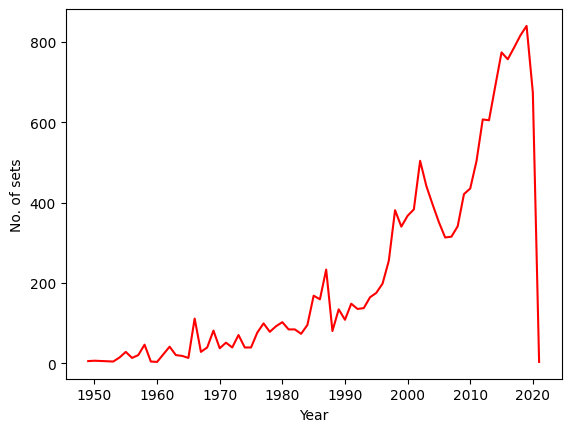

In [90]:
plt.xlabel('Year')
plt.ylabel('No. of sets')

plt.plot(sets_by_year.index, sets_by_year.set_num, "red")
# This has to be corrected due to the issue listed above

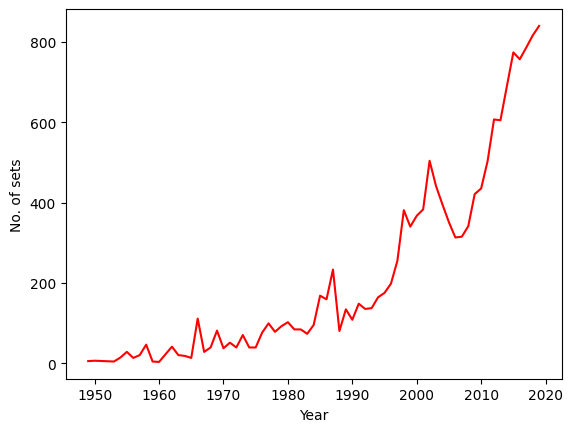

In [91]:
plt.xlabel('Year')
plt.ylabel('No. of sets')

# Slicing the last two years for the graph
plt.plot(sets_by_year.index[:-2], sets_by_year.set_num[:-2], "red")

### Aggregate Data with the Python .agg() Function

Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

In [94]:
themes_by_year = sets_df.groupby('year').agg({'theme_id': pd.Series.nunique})

**Some stuff to know about** `agg()`
- `.agg()` method takes a dictionary as an argument
- In this dictionary, we specify which operation we'd like to apply to each column.
- In our case we want to apply .nunique() method.

In [97]:
# Renaming our column name theme_id
themes_by_year.rename(columns={'theme_id':'nr_themes'}, inplace=True)
themes_by_year.head()

,nr_themes
year,
1949,2
1950,1
1953,2
1954,2
1955,4


In [98]:
themes_by_year.tail()

,nr_themes
year,
2017,89
2018,93
2019,78
2020,82
2021,1


**Challenge**: Plot the number of themes released by year on a line chart. Only include the full calendar years (i.e., exclude 2020 and 2021). 

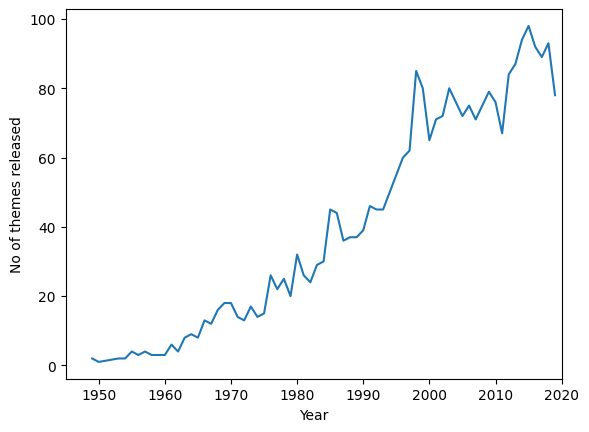

In [108]:
plt.xlabel('Year')
plt.ylabel('No of themes released')
plt.xlim(1945, 2020)
plt.plot(themes_by_year.index[:-2], themes_by_year.nr_themes[:-2])

### Line Charts with Two Seperate Axes

Text(0, 0.5, 'No of themes released')

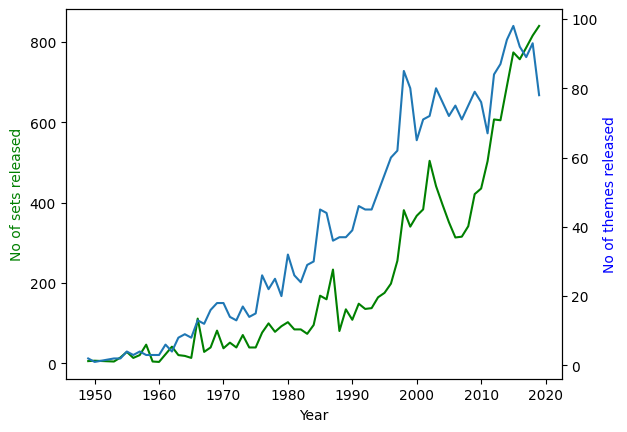

In [112]:
# Creating two seperate axes
ax1 = plt.gca() # get current axes
ax2 = ax1.twinx()

# Plotting both graphs here
ax1.plot(sets_by_year.index[:-2], sets_by_year.set_num[:-2], color='g')
ax2.plot(themes_by_year.index[:-2], themes_by_year.nr_themes[:-2])

# Now cofiguring graphs for both axis
ax1.set_xlabel('Year')
ax1.set_ylabel('No of sets released', color='green')
ax2.set_ylabel('No of themes released', color='blue')

**Challenge**: Use the <code>.groupby()</code> and <code>.agg()</code> function together to figure out the average number of parts per set. How many parts did the average LEGO set released in 1954 compared to say, 2017?

In [126]:
parts_per_year = sets_df.groupby('year').agg({'num_parts': pd.Series.mean})

In [127]:
parts_per_year.head()

,num_parts
year,
1949,99.600000
1950,1.000000
1953,13.500000
1954,12.357143
1955,36.607143


### Scatter Plots in Matplotlib

**Challenge**: Has the size and complexity of LEGO sets increased over time based on the number of parts? Plot the average number of parts over time using a Matplotlib scatter plot. See if you can use the [scatter plot documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html) before I show you the solution. Do you spot a trend in the chart? 

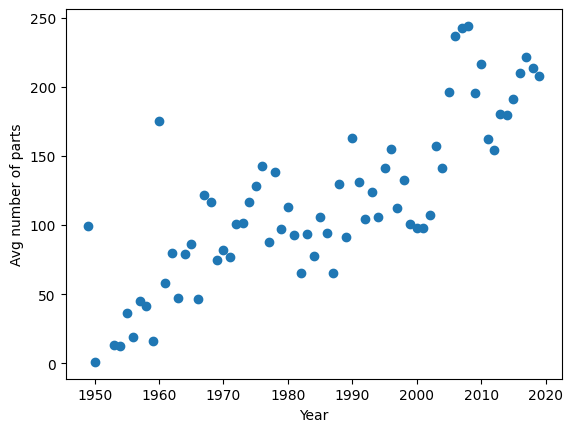

In [135]:
plt.xlabel('Year')
plt.ylabel('Avg number of parts')
plt.scatter(parts_per_year.index[:-2], parts_per_year.num_parts[:-2])

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets? 

In [140]:
sets_df.groupby('theme_id').agg({'set_num': pd.Series.count}).sort_values('set_num', ascending=False)

,set_num
theme_id,
158,753
501,656
494,398
435,356
503,329
...,...
361,1
380,1
379,1


**Challenge** Use what you know about HTML markup and tags to display the database schema: https://i.imgur.com/Sg4lcjx.png

<img src="https://i.imgur.com/Sg4lcjx.png"></img>

### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv. 

**Challenge**: Explore the themes.csv. How is it structured? Search for the name 'Star Wars'. How many <code>id</code>s correspond to this name in the themes.csv? Now use these <code>id</code>s and find the corresponding the sets in the sets.csv (Hint: you'll need to look for matches in the <code>theme_id</code> column)

In [142]:
themes_df = pd.read_csv('./data/themes.csv')
themes_df.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [146]:
theme_ids_for_starwars = themes_df[themes_df.name == 'Star Wars'].id
print(theme_ids_for_starwars)

17      18
150    158
174    209
211    261
Name: id, dtype: int64


**Using the ids** to get the reqd data from sets_df

In [157]:
for i in theme_ids_for_starwars:
  sets_with_theme_starwars = sets_df[sets_df.theme_id == i]
  print(sets_with_theme_starwars[['name', 'theme_id', 'year']])


                                     name  theme_id  year
8786   R2-D2 / C-3PO Droid Collectors Set        18  2002
12051                           Pit Droid        18  2000
12058                        Battle Droid        18  2000
12066                     Destroyer Droid        18  2000
12071                               C-3PO        18  2001
12072                        Stormtrooper        18  2001
12073                               R2-D2        18  2002
12074                         Darth Vader        18  2002
12081                          Jango Fett        18  2002
12083                  Super Battle Droid        18  2002
15273      Darth Vader / Stormtrooper Kit        18  2002
                                                    name  theme_id  year
850                  Star Wars: Build Your Own Adventure       158  2016
855    Parts for Star Wars Build Your Own Adventure: ...       158  2019
1717                             Clone Turbo Tank - Mini       158  2008
1728        

### Merging (i.e., Combining) DataFrames based on a Key


In [160]:
# Counting the no of times themes used
set_themes_count = sets_df['theme_id'].value_counts()
set_themes_count.head()

theme_id
158    753
501    656
494    398
435    356
503    329
Name: count, dtype: int64

In [161]:
# Converting pandas series to pandas dataframe
set_themes_count = pd.DataFrame({'id': set_themes_count.index, 'set_count': set_themes_count.values})
# providing a dictionary to create the DataFrame. 
# The keys in the dictionary become my column names.
set_themes_count.head()

,id,set_count
0,158,753
1,501,656
2,494,398
3,435,356
4,503,329


In [163]:
merge_df = pd.merge(set_themes_count, themes_df, on='id')
merge_df.sort_values('id').head()

,id,set_count,name,parent_id
12,1,167,Technic,NaN
478,2,4,Arctic Technic,1.0
214,3,18,Competition,1.0
89,4,39,Expert Builder,1.0
287,5,12,Model,1.0


## Bar Graphs

<BarContainer object of 20 artists>

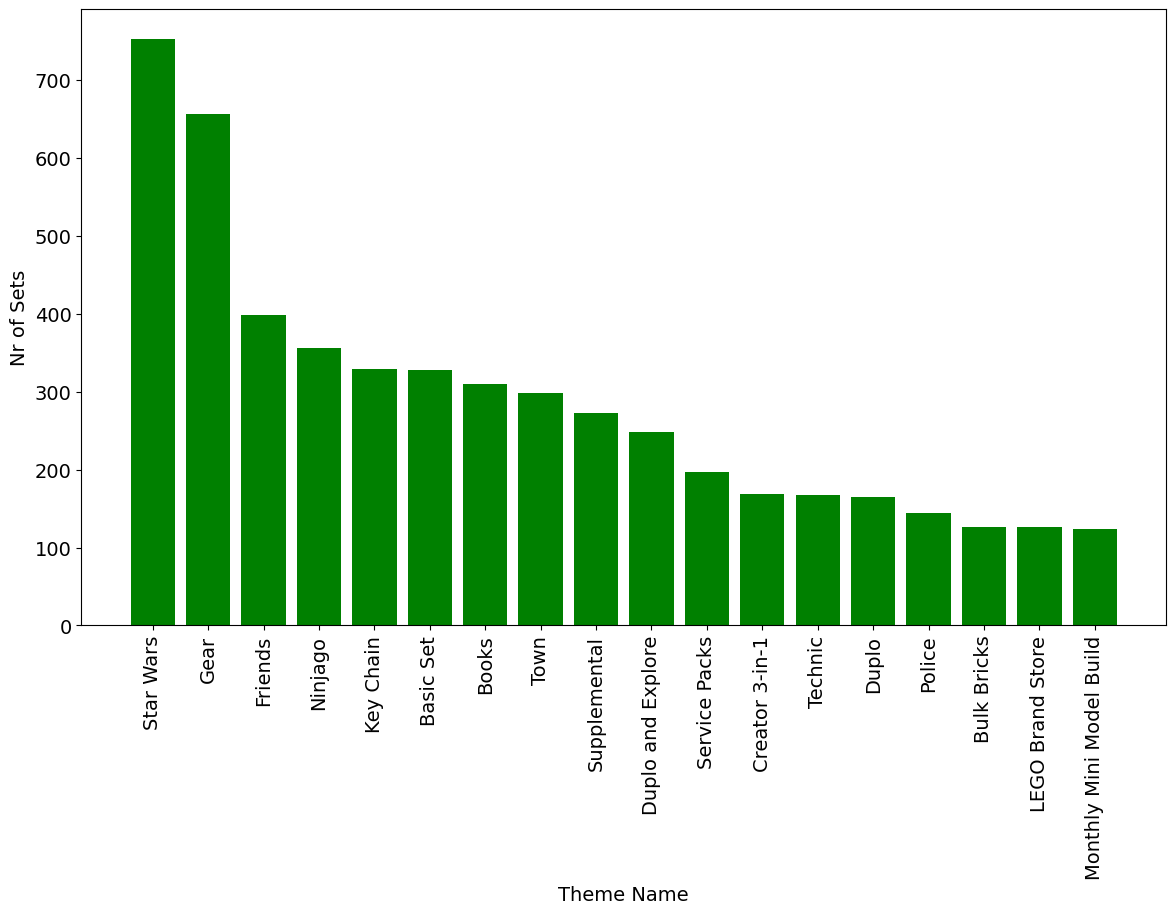

In [171]:
plt.figure(figsize=(14,8))
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.ylabel('Nr of Sets', fontsize=14)
plt.xlabel('Theme Name', fontsize=14)

plt.bar(merge_df.name[:20], merge_df.set_count[:20], color='g')